In [9]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [10]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [11]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'


In [12]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights



vgg16 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94773248/94765736 [==============================] - 403s 4us/step


In [13]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [14]:
  # useful for getting number of output classes
folders = glob('train/*')

In [15]:
folders

['train\\Bacterial leaf blight', 'train\\Brown spot', 'train\\Leaf smut']

In [16]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [17]:
len(folders)

3

In [18]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [19]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [20]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 120 images belonging to 3 classes.


In [23]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28 images belonging to 3 classes.


In [24]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\ASK\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
4/4 [==============================] - 27s 6s/step - loss: 7.7273 - accuracy: 0.2500 - val_loss: 1.0492 - val_accuracy: 0.4286
Epoch 2/20
4/4 [==============================] - 18s 4s/step - loss: 3.9838 - accuracy: 0.3583 - val_loss: 4.8786 - val_accuracy: 0.2857
Epoch 3/20
4/4 [==============================] - 18s 4s/step - loss: 3.8098 - accuracy: 0.3333 - val_loss: 4.0089 - val_accuracy: 0.2857
Epoch 4/20
4/4 [==============================] - 19s 5s/step - loss: 2.7696 - accuracy: 0.4000 - val_loss: 1.2698 - val_accuracy: 0.4286
Epoch 5/20
4/4 [==============================] - 19s 5s/step - loss: 1.5044 - accuracy: 0.3917 - val_loss: 1.6499 - val_accuracy: 0.4643
Epoch 6/20
4/4 [==============================] - 18s 5s/step - loss: 1.2017 - accuracy: 0.4500 - val_loss: 0.9561 - val_accuracy: 0.3929
Epoch 7/20
4/4 [==============================] - 19s 5s/step - loss: 1.1139 - accuracy: 0.4250 - val_loss: 0.8744 - val_accuracy: 0.5000
Epoch 8/20
4/4 [==================

In [23]:

from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [25]:
import matplotlib.pyplot as plt

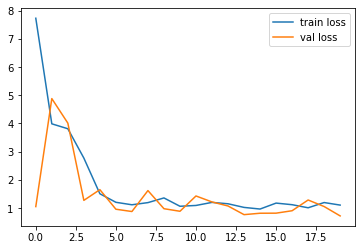

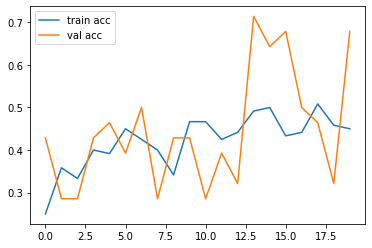

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

[[0.000000e+00 1.000000e+00 5.269699e-35]]


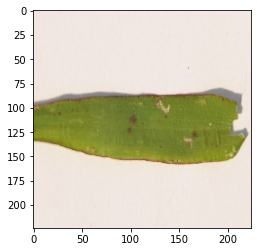

In [27]:
from keras.preprocessing import image
img = image.load_img("C:/Users/ASK/Desktop/DR/Test/Leaf smut/DSC_0293.JPG",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("model_vgg16.h5")
output = saved_model.predict(img)
print (output)

In [44]:
model.predict(img)

array([[0.000000e+00, 1.000000e+00, 5.269699e-35]], dtype=float32)

In [73]:
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
get_ipython().run_line_magic('matplotlib', 'inline')
from ipykernel import kernelapp as app
import imageio


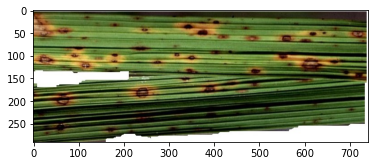

In [74]:
#load and pre-process a new image to make predictions
img_path = 'Train/Leaf smut/DSC_0516.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)

my_image = imageio.imread(img_path)
imshow(my_image) 

In [76]:
#make predictions using the trained model
prob = model.predict(x)
preds = model.predict_classes(x)

for catclass, label in train_label_map.items():
    if preds == label:
        print("Class label:", preds, "Class name:", catclass)
              
print("Probability:", prob) #print the probability 

AttributeError: 'Functional' object has no attribute 'predict_classes'

In [77]:
train_label_map = (training_set.class_indices)
print(train_label_map)


{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}


In [78]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

#for plotting & image viewing
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
get_ipython().run_line_magic('matplotlib', 'inline')
from ipykernel import kernelapp as app
import imageio


#data preprocessing example, to illustrate image transformations
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img